In [1]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we implement Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

## Linear Regression problem
The goal of linear regression is to fit a line to a set of points.

In [2]:
n=100

In [3]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.9243,  1.0000],
        [ 0.7921,  1.0000],
        [ 0.5451,  1.0000],
        [-0.9644,  1.0000],
        [ 0.8322,  1.0000]])

In [4]:
a = tensor(3.,2); a

tensor([3., 2.])

In [5]:
y = x@a + torch.rand(n)

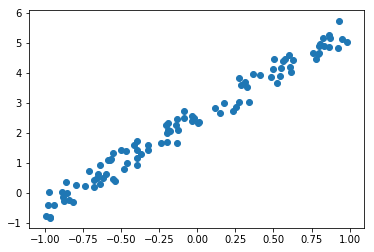

In [6]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) a such that you minimize the error between the points and the line x@a. Note that here a is unknown. For a regression problem the most common error function or loss function is the **mean squared error**.

In [7]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe a = (-1.0,1.0) then we can compute y_hat which is our prediction and then compute our error.

In [8]:
a = tensor(-1.,1)

In [9]:
y_hat = x@a
mse(y_hat, y)

tensor(7.1543)

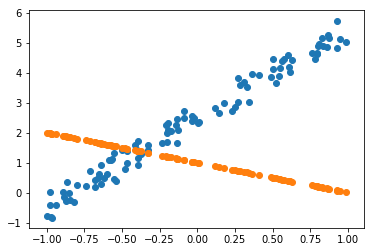

In [10]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);


So far we have specified the *model* (linear regression) and the *evaluation criteria* (or loss function). Now we need to handle *optimization*; that is, how do we find the best values for a? How do we find the best *fitting* linear regression.


## Gradient Descent

We would like to find the values of a that minimize mse_loss.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](https://pytorch.org).

In [11]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [12]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [13]:
lr = 1e-1
for t in range(100): update()

tensor(7.1543, grad_fn=<MeanBackward0>)
tensor(1.4601, grad_fn=<MeanBackward0>)
tensor(0.3939, grad_fn=<MeanBackward0>)
tensor(0.1496, grad_fn=<MeanBackward0>)
tensor(0.0930, grad_fn=<MeanBackward0>)
tensor(0.0799, grad_fn=<MeanBackward0>)
tensor(0.0768, grad_fn=<MeanBackward0>)
tensor(0.0761, grad_fn=<MeanBackward0>)
tensor(0.0760, grad_fn=<MeanBackward0>)
tensor(0.0759, grad_fn=<MeanBackward0>)


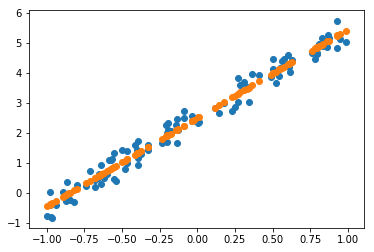

In [14]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);


## **Animate it!**

In [15]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [16]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)